In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Load dataset
iris = load_iris()
X = iris.data
y = (iris.target == 0).astype(int)  # Setosa = 1, Others = 0

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [15]:
from sklearn.linear_model import LogisticRegression

lr_iris = LogisticRegression()
lr_iris.fit(X_train, y_train)
y_pred = lr_iris.predict(X_test)
y_prob = lr_iris.predict_proba(X_test)[:, 1]  # Probability of class = 1


In [16]:
from sklearn.metrics import classification_report, accuracy_score

print("🌼 Logistic Regression on Iris Dataset (Setosa vs Others)\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Other", "Setosa"]))


🌼 Logistic Regression on Iris Dataset (Setosa vs Others)

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

       Other       1.00      1.00      1.00        26
      Setosa       1.00      1.00      1.00        19

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128160 (\N{DIAMOND SHAPE WITH A DOT INSIDE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


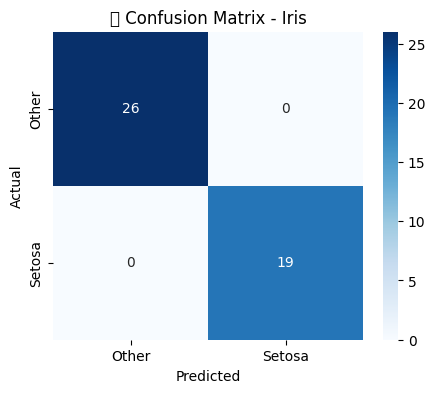

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d', xticklabels=["Other", "Setosa"], yticklabels=["Other", "Setosa"])
plt.title("💠 Confusion Matrix - Iris")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127800 (\N{CHERRY BLOSSOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


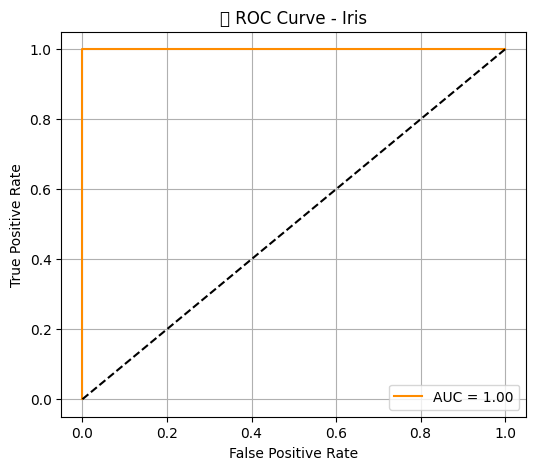

In [18]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("🌸 ROC Curve - Iris")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


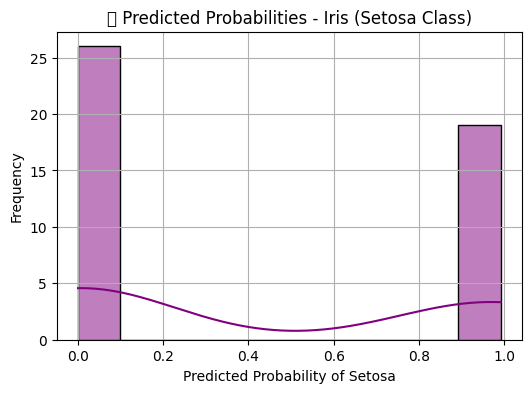

In [19]:
plt.figure(figsize=(6,4))
sns.histplot(y_prob, bins=10, kde=True, color='purple')
plt.title("📊 Predicted Probabilities - Iris (Setosa Class)")
plt.xlabel("Predicted Probability of Setosa")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
